Visualize movies by the DOMESTIC GROSSES Adjusted for Ticket Price Inflation
1. Web Scraping 'http://www.boxofficemojo.com/alltime/adjusted.htm' to get boxoffice data
2. visualize top 20 movies with domestic gross adjusted for ticket price inflation.
3. visualize top 20 movies with domestic gross without adjust.
modified for domestic grosses adjusted for ticket price inflation data based on https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency

In [4]:
import requests
from bs4 import BeautifulSoup  ## web scrapeing
import pandas as pd

In [72]:
final_list = []

In [6]:
page = 'http://www.boxofficemojo.com/alltime/adjusted.htm'
resp = requests.get(page)
soup = BeautifulSoup(resp.text, 'lxml')

In [ ]:
print(soup.prettify()) # print out the HTML content of the page, formatted nicely

In [73]:
# trial and error to get the exact positions
table_data = [x.text for x in soup.select('tr td')[9:310]]  

In [74]:
table_data[0:7]

['1',
 'Gone with the Wind',
 'MGM',
 '$1,850,728,800',
 '$198,676,459',
 '1939^',
 '2']

In [75]:
# put every 5 values in a row
temp_list = [table_data[i:i+6] for i in range(0, len(table_data[:-5]), 6)] 

In [76]:
for temp in temp_list:
    final_list.append(temp)

In [77]:
boxoffice_df = pd.DataFrame.from_records(final_list)

boxoffice_df.head(10)

,0,1,2,3,4,5
0,1,Gone with the Wind,MGM,"$1,850,728,800","$198,676,459",1939^
1,2,Star Wars,Fox,"$1,631,575,500","$460,998,007",1977^
2,3,The Sound of Music,Fox,"$1,304,524,800","$158,671,368",1965
3,4,E.T.: The Extra-Terrestrial,Uni.,"$1,299,385,700","$435,110,554",1982^
4,5,Titanic,Par.,"$1,241,636,300","$659,363,944",1997^
5,6,The Ten Commandments,Par.,"$1,199,960,000","$65,500,000",1956
6,7,Jaws,Uni.,"$1,173,202,000","$260,000,000",1975
7,8,Doctor Zhivago,MGM,"$1,137,080,800","$111,721,910",1965
8,9,The Exorcist,WB,"$1,013,088,400","$232,906,145",1973^
9,10,Snow White and the Seven Dwarfs,Dis.,"$998,440,000","$184,925,486",1937^


In [78]:
boxoffice_df.tail(15)

,0,1,2,3,4,5
35,36,Shrek 2,DW,"$650,826,500","$441,226,247",2004
36,37,Butch Cassidy and the Sundance Kid,Fox,"$646,309,900","$102,308,889",1969
37,38,Love Story,Par.,"$641,183,000","$106,397,186",1970
38,39,Spider-Man,Sony,"$636,480,300","$403,706,375",2002
39,40,Independence Day,Fox,"$634,502,900","$306,169,268",1996^
40,41,Home Alone,Fox,"$620,445,300","$285,761,243",1990
41,42,Star Wars: The Last Jedi,BV,"$618,830,200","$620,181,382",2017
42,43,Pinocchio,Dis.,"$617,414,500","$84,254,167",1940^
43,44,Cleopatra (1963),Fox,"$615,400,500","$57,777,778",1963
44,45,Beverly Hills Cop,Par.,"$615,094,200","$234,760,478",1984


In [86]:
[i for i, x in enumerate(final_list) if x[5] == 'n/a'] # get the indexes of the 'n/a' values

[]

In [87]:
boxoffice_df.shape[0]

50

In [89]:
import re
regex = '|'.join(['\$', ',', '\^'])

columns = ['rank', 'title', 'studio', 'adjusted_gross', 'Unadjusted_gross' 'year']

boxoffice_df = pd.DataFrame({
    'rank': [int(x[0]) for x in final_list],  # convert ranks to integers
    'title': [x[1] for x in final_list],  # get titles as is
    'studio': [x[2] for x in final_list],  # get studio names as is
    'adjusted_gross': [int(re.sub(regex, '', x[3])) for x in final_list],  # remove special characters and convert to integer
    'Unadjusted_gross': [int(re.sub(regex, '', x[4])) for x in final_list],  # remove special characters and convert to integer
    'year': [int(re.sub(regex, '', str(x[5]))) for x in final_list],  # remove special characters and convert to integer
})
print('rows:', boxoffice_df.shape[0])
print('columns:', boxoffice_df.shape[1])
print('\ndata types:')
print(boxoffice_df.dtypes)
boxoffice_df.head(15)

rows: 50
columns: 6

data types:
Unadjusted_gross     int64
adjusted_gross       int64
rank                 int64
studio              object
title               object
year                 int64
dtype: object


,Unadjusted_gross,adjusted_gross,rank,studio,title,year
0,198676459,1850728800,1,MGM,Gone with the Wind,1939
1,460998007,1631575500,2,Fox,Star Wars,1977
2,158671368,1304524800,3,Fox,The Sound of Music,1965
3,435110554,1299385700,4,Uni.,E.T.: The Extra-Terrestrial,1982
4,659363944,1241636300,5,Par.,Titanic,1997
5,65500000,1199960000,6,Par.,The Ten Commandments,1956
6,260000000,1173202000,7,Uni.,Jaws,1975
7,111721910,1137080800,8,MGM,Doctor Zhivago,1965
8,232906145,1013088400,9,WB,The Exorcist,1973
9,184925486,998440000,10,Dis.,Snow White and the Seven Dwarfs,1937


In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

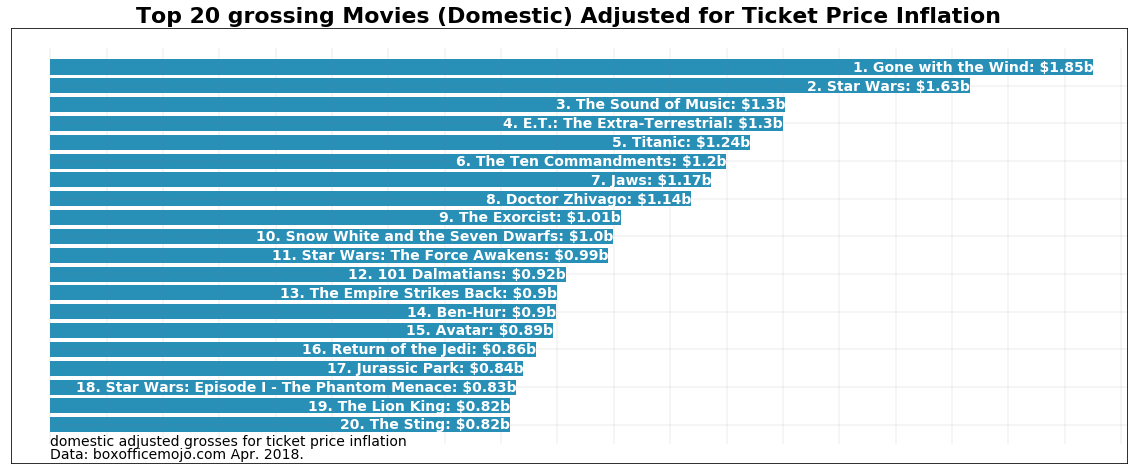

In [139]:
plt.figure(figsize=(20,8))
boxoffice_df_abs = boxoffice_df.sort_values('adjusted_gross', ascending=False).reset_index()
plt.barh(range(20),
         list(reversed(boxoffice_df_abs['adjusted_gross'][:20])), color='#288FB7')
for i, title in enumerate(boxoffice_df_abs['title'][:20]):
    plt.text(boxoffice_df_abs['adjusted_gross'][i], 20-i-1, 
             s=str(i+1) + '. '+ title + ': ' + '$' + str(round(boxoffice_df_abs['adjusted_gross'][i] / 1000_000_000, 2)) + 'b',
             ha='right', va='center', fontsize=14, color='white', fontweight='bold')
plt.text(0.4, -1.1, s='domestic adjusted grosses for ticket price inflation', fontsize=14)
plt.text(0.4, -1.8, s='Data: boxofficemojo.com Apr. 2018.', fontsize=14)

plt.vlines(range(0, 2_500_000_000, 100_000_000), -1, 20, colors='gray', alpha=0.1)
plt.hlines(range(0, 20, 2), 0, 10_000_000_000, colors='gray', alpha=0.1)
plt.xlim((-70_000_000, 19_10_000_000))
plt.yticks([])
plt.xticks([])
plt.title('Top 20 grossing Movies (Domestic) Adjusted for Ticket Price Inflation', fontsize=22, fontweight='bold')

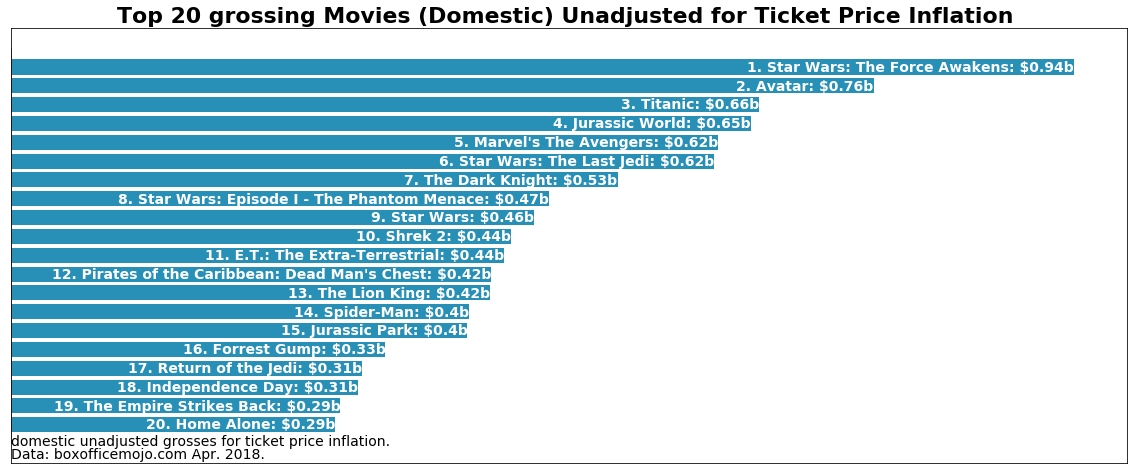

In [140]:
plt.figure(figsize=(20,8))
boxoffice_df_abs = boxoffice_df.sort_values('Unadjusted_gross', ascending=False).reset_index()

plt.barh(range(20),
         list(reversed(boxoffice_df_abs['Unadjusted_gross'][:20])), color='#288FB7')
for i, title in enumerate(boxoffice_df_abs['title'][:20]):
    plt.text(boxoffice_df_abs['Unadjusted_gross'][i], 20-i-1, 
             s=str(i+1) + '. '+ title + ': ' + '$' + str(round(boxoffice_df_abs['Unadjusted_gross'][i] / 1000_000_000, 2)) + 'b',
             ha='right', va='center', fontsize=14, color='white', fontweight='bold')
plt.text(0.4, -1.1, s='domestic unadjusted grosses for ticket price inflation.', fontsize=14)
plt.text(0.4, -1.8, s='Data: boxofficemojo.com Apr. 2018.', fontsize=14)


plt.vlines(range(0, 210, 10), -1, 20, colors='gray', alpha=0.1)
plt.hlines(range(0, 20, 2), 0, 210, colors='gray', alpha=0.1)
plt.yticks([])
plt.xticks([])
plt.title('Top 20 grossing Movies (Domestic) Unadjusted for Ticket Price Inflation ', fontsize=22, fontweight='bold')